# Top Earners in Movie Industry

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="#intro"></a>
## Introduction

> This analysis project is to be done using the imdb movie data. When the analysis is completed, you should be able to find the top 5 highest grossing directors, the top 5 highest grossing movie genres of all time, comparing the revenue of the highest grossing movies and which companies released the most movies. 

> There are 10 columns that will not be needed for the analysis. Use pandas to drop these columns. HINT: Only the columns pertaining to revenue will be needed.

> To get you started, I've already placed the needed code for getting the packages and datafile that you will be using for the project. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('imdb-movies.csv')

### Drop columns without neccesary information and remove all records with no financial information -- Pay close attention to things that don't tell you anything regarding financial data

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.drop(['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'release_date'], axis='columns', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10866 non-null  int64  
 1   revenue               10866 non-null  int64  
 2   original_title        10866 non-null  object 
 3   director              10822 non-null  object 
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   vote_count            10866 non-null  int64  
 7   vote_average          10866 non-null  float64
 8   release_year          10866 non-null  int64  
 9   budget_adj            10866 non-null  float64
 10  revenue_adj           10866 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 933.9+ KB


### Data Cleaning

In [7]:
# Delete all records with null, or empty values
df.isnull().sum()

budget                     0
revenue                    0
original_title             0
director                  44
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

budget                  0
revenue                 0
original_title          0
director                0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Here's a helpful hint from my own analysis when I ran this the first time. This may help shed light on what your data set should look like.

#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

In [10]:
# create two new csv files 
df.to_csv('production_companies.csv', index=False)

df.to_csv('genres.csv', index=False)

In [11]:
# read from csv file 
df_production_companies = pd.read_csv('production_companies.csv')
df_genres = pd.read_csv('genres.csv')

In [12]:
# remove production_companies from genres file 
df_genres.drop(['production_companies'], axis=1, inplace=True)

In [13]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807 entries, 0 to 9806
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          9807 non-null   int64  
 1   revenue         9807 non-null   int64  
 2   original_title  9807 non-null   object 
 3   director        9807 non-null   object 
 4   genres          9807 non-null   object 
 5   vote_count      9807 non-null   int64  
 6   vote_average    9807 non-null   float64
 7   release_year    9807 non-null   int64  
 8   budget_adj      9807 non-null   float64
 9   revenue_adj     9807 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 766.3+ KB


In [14]:
df_production_companies.drop(['genres'], axis=1, inplace=True)

In [15]:
df_production_companies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807 entries, 0 to 9806
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                9807 non-null   int64  
 1   revenue               9807 non-null   int64  
 2   original_title        9807 non-null   object 
 3   director              9807 non-null   object 
 4   production_companies  9807 non-null   object 
 5   vote_count            9807 non-null   int64  
 6   vote_average          9807 non-null   float64
 7   release_year          9807 non-null   int64  
 8   budget_adj            9807 non-null   float64
 9   revenue_adj           9807 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 766.3+ KB


In [16]:
df_production_companies

,budget,revenue,original_title,director,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...
9802,0,0,The Endless Summer,Bruce Brown,Bruce Brown Films,11,7.4,1966,0.000000e+00,0.000000e+00
9803,0,0,Grand Prix,John Frankenheimer,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.000000e+00,0.000000e+00
9804,0,0,Beregis Avtomobilya,Eldar Ryazanov,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00
9805,0,0,"What's Up, Tiger Lily?",Woody Allen,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00


In [17]:
production_companies = df_production_companies[df_production_companies.production_companies.str.contains('|', regex=False)]

In [18]:
production_companies.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9775, 9777, 9778, 9788, 9789, 9795, 9798, 9800, 9801, 9803],
           dtype='int64', length=6392)

In [19]:
production_companies.count()

budget                  6392
revenue                 6392
original_title          6392
director                6392
production_companies    6392
vote_count              6392
vote_average            6392
release_year            6392
budget_adj              6392
revenue_adj             6392
dtype: int64

In [20]:
df_production_companies.drop(production_companies.index, inplace=True)

In [21]:
df_production_companies.count()

budget                  3415
revenue                 3415
original_title          3415
director                3415
production_companies    3415
vote_count              3415
vote_average            3415
release_year            3415
budget_adj              3415
revenue_adj             3415
dtype: int64

In [22]:
production_companies

,budget,revenue,original_title,director,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...
9795,0,0,The Chase,Arthur Penn,Horizon Pictures|Columbia Pictures Corporation,17,6.0,1966,0.000000e+00,0.000000e+00
9798,0,0,Nevada Smith,Henry Hathaway,Paramount Pictures|Solar Productions|Embassy P...,10,5.9,1966,0.000000e+00,0.000000e+00
9800,0,0,Seconds,John Frankenheimer,Gibraltar Productions|Joel Productions|John Fr...,22,6.6,1966,0.000000e+00,0.000000e+00
9801,0,0,Carry On Screaming!,Gerald Thomas,Peter Rogers Productions|Anglo-Amalgamated Fil...,13,7.0,1966,0.000000e+00,0.000000e+00


In [23]:
new_production = []
p2 = production_companies.copy()
for p in p2['production_companies']:
    p1 = production_companies.copy()
    p1['production_companies'] = p2['production_companies'].apply(lambda x:x.split('|')[0])
    p2['production_companies'] = p2['production_companies'].apply(lambda x:'|'.join(x.split('|')[1:]))
    new_production.append(p1)
    
df_production_companies = df_production_companies.append(new_production, ignore_index=True)

In [24]:
df_production_companies.isnull().sum()

budget                  0
revenue                 0
original_title          0
director                0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [25]:
df_production_companies

,budget,revenue,original_title,director,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,130000000,518602163,Ant-Man,Peyton Reed,Marvel Studios,3779,7.0,2015,1.195999e+08,4.771138e+08
1,12000000,85512300,Paper Towns,Jake Schreier,Fox 2000 Pictures,1252,6.2,2015,1.104000e+07,7.867128e+07
2,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,Furthur Films,81,5.5,2015,0.000000e+00,4.222338e+04
3,0,0,Mythica: The Darkspore,Anne K. Black,Arrowstorm Entertainment,27,5.1,2015,0.000000e+00,0.000000e+00
4,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,Indian Paintbrush,569,7.7,2015,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
40861074,0,0,The Chase,Arthur Penn,,17,6.0,1966,0.000000e+00,0.000000e+00
40861075,0,0,Nevada Smith,Henry Hathaway,,10,5.9,1966,0.000000e+00,0.000000e+00
40861076,0,0,Seconds,John Frankenheimer,,22,6.6,1966,0.000000e+00,0.000000e+00
40861077,0,0,Carry On Screaming!,Gerald Thomas,,13,7.0,1966,0.000000e+00,0.000000e+00


In [26]:
df_production_companies[df_production_companies.production_companies.str.contains('|', regex=False)]

,budget,revenue,original_title,director,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [27]:
# need to remove empty data
df_production_companies = df_production_companies[df_production_companies["production_companies"] != ""]

In [28]:
df_production_companies

,budget,revenue,original_title,director,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,130000000,518602163,Ant-Man,Peyton Reed,Marvel Studios,3779,7.0,2015,1.195999e+08,4.771138e+08
1,12000000,85512300,Paper Towns,Jake Schreier,Fox 2000 Pictures,1252,6.2,2015,1.104000e+07,7.867128e+07
2,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,Furthur Films,81,5.5,2015,0.000000e+00,4.222338e+04
3,0,0,Mythica: The Darkspore,Anne K. Black,Arrowstorm Entertainment,27,5.1,2015,0.000000e+00,0.000000e+00
4,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,Indian Paintbrush,569,7.7,2015,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
35080,42000000,20844907,Super Mario Bros.,Annabel Jankel|Rocky Morton,Nintendo,114,4.0,1993,6.339774e+07,3.146476e+07
35092,20000000,153698625,Free Willy,Simon Wincer,Donner/Shuler-Donner Productions,226,5.9,1993,3.018940e+07,2.320035e+08
35118,25000000,6,The House of the Spirits,Bille August,Neue Constantin Film,52,6.7,1993,3.773675e+07,9.056820e+00
35217,24500000,17218023,The Mission,Roland JoffÃ©,Kingsmere Productions Ltd.,127,6.8,1986,4.874046e+07,3.425365e+07


In [29]:
df_genres

,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...
9802,0,0,The Endless Summer,Bruce Brown,Documentary,11,7.4,1966,0.000000e+00,0.000000e+00
9803,0,0,Grand Prix,John Frankenheimer,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,0.000000e+00
9804,0,0,Beregis Avtomobilya,Eldar Ryazanov,Mystery|Comedy,11,6.5,1966,0.000000e+00,0.000000e+00
9805,0,0,"What's Up, Tiger Lily?",Woody Allen,Action|Comedy,22,5.4,1966,0.000000e+00,0.000000e+00


In [30]:
# do same with genres
genres = df_genres[df_genres.genres.str.contains('|', regex=False)]

In [31]:
df_genres.drop(genres.index, inplace=True)

In [32]:
df_genres

,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
25,150000000,682330139,Mission: Impossible - Rogue Nation,Christopher McQuarrie,Action,2349,7.1,2015,1.379999e+08,6.277435e+08
26,68000000,215863606,Ted 2,Seth MacFarlane,Comedy,1666,6.3,2015,6.255997e+07,1.985944e+08
51,35000000,194564672,The Intern,Nancy Meyers,Comedy,1255,7.1,2015,3.219999e+07,1.789994e+08
55,20000000,36606743,Burnt,John Wells,Drama,631,6.3,2015,1.839999e+07,3.367819e+07
58,15000000,64191523,The Danish Girl,Tom Hooper,Drama,867,7.3,2015,1.379999e+07,5.905618e+07
...,...,...,...,...,...,...,...,...,...,...
9788,0,0,Dracula: Prince of Darkness,Terence Fisher,Horror,16,5.7,1966,0.000000e+00,0.000000e+00
9794,0,0,A Big Hand for the Little Lady,Fielder Cook,Western,11,6.0,1966,0.000000e+00,0.000000e+00
9801,0,0,Carry On Screaming!,Gerald Thomas,Comedy,13,7.0,1966,0.000000e+00,0.000000e+00
9802,0,0,The Endless Summer,Bruce Brown,Documentary,11,7.4,1966,0.000000e+00,0.000000e+00


In [33]:
new_genre = []
g2 = genres.copy()
for g in g2['genres']:
    g1 = genres.copy()
    g1['genres'] = g2['genres'].apply(lambda x:x.split('|')[0])
    g2['genres'] = g2['genres'].apply(lambda x:'|'.join(x.split('|')[1:]))
    new_genre.append(g1)
    
df_genres = df_genres.append(new_genre, ignore_index=True)

In [34]:
df_genres.dropna(inplace=True)

In [35]:
df_genres[df_genres.genres.str.contains('|', regex=False)]

,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [36]:
# need to remove empty data
df_genres = df_genres[df_genres["genres"] != ""]

In [37]:
df_genres

,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,682330139,Mission: Impossible - Rogue Nation,Christopher McQuarrie,Action,2349,7.1,2015,1.379999e+08,6.277435e+08
1,68000000,215863606,Ted 2,Seth MacFarlane,Comedy,1666,6.3,2015,6.255997e+07,1.985944e+08
2,35000000,194564672,The Intern,Nancy Meyers,Comedy,1255,7.1,2015,3.219999e+07,1.789994e+08
3,20000000,36606743,Burnt,John Wells,Drama,631,6.3,2015,1.839999e+07,3.367819e+07
4,15000000,64191523,The Danish Girl,Tom Hooper,Drama,867,7.3,2015,1.379999e+07,5.905618e+07
...,...,...,...,...,...,...,...,...,...,...
41109,1377800,0,Batman,Leslie H. Martinson,Crime,99,5.9,1966,9.256081e+06,0.000000e+00
41117,12000000,20000000,The Sand Pebbles,Robert Wise,Romance,28,7.0,1966,8.061618e+07,1.343603e+08
41122,0,0,Khartoum,Basil Dearden|Eliot Elisofon,Action,12,5.8,1966,0.000000e+00,0.000000e+00
41128,0,0,Harper,Jack Smight,Mystery,14,6.0,1966,0.000000e+00,0.000000e+00


<a id="eda"></a>
## Exploratory Data Analysis

> Use Matplotlib to display your data analysis

### Which production companies released the most movies in the last 10 years? Display the top 5 production companies.

In [38]:
most_movies = df_production_companies.query('release_year >= 2012').production_companies.value_counts()
most_movies

Universal Pictures                        51
Warner Bros.                              46
Columbia Pictures                         35
Paramount Pictures                        35
Blumhouse Productions                     33
                                          ..
Erfttal Film                               1
Warner Bros. Interactive Entertainment     1
Gracie Films                               1
G4 Productions                             1
CinÃ©mage                                  1
Name: production_companies, Length: 2969, dtype: int64

### What 5 movie genres grossed the highest all-time?

In [49]:
best_movie_genre = df_genres.groupby('genres').revenue.sum().nlargest(5)

In [50]:
best_movie_genre

genres
Action       173418313979
Adventure    166317625752
Comedy       142141376544
Drama        138896772395
Thriller     121189561087
Name: revenue, dtype: int64

### Who are the top 5 grossing directors?

In [53]:
best_movie_director = df.groupby('director').revenue.sum().nlargest(5)

In [54]:
best_movie_director

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
Name: revenue, dtype: int64

### Compare the revenue of the highest grossing movies of all time.

In [56]:
highest_grossing_movies = df.nlargest(15, 'revenue')
highest_grossing_movies

,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,237000000,2781505847,Avatar,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,200000000,1845034188,Titanic,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,220000000,1519557910,The Avengers,Joss Whedon,Science Fiction|Action|Adventure,Marvel Studios,8903,7.3,2012,2.089437e+08,1.443191e+09
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
4,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
14,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,200000000,1215439994,Iron Man 3,Shane Black,Action|Adventure|Science Fiction,Marvel Studios,6882,6.9,2013,1.872067e+08,1.137692e+09


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

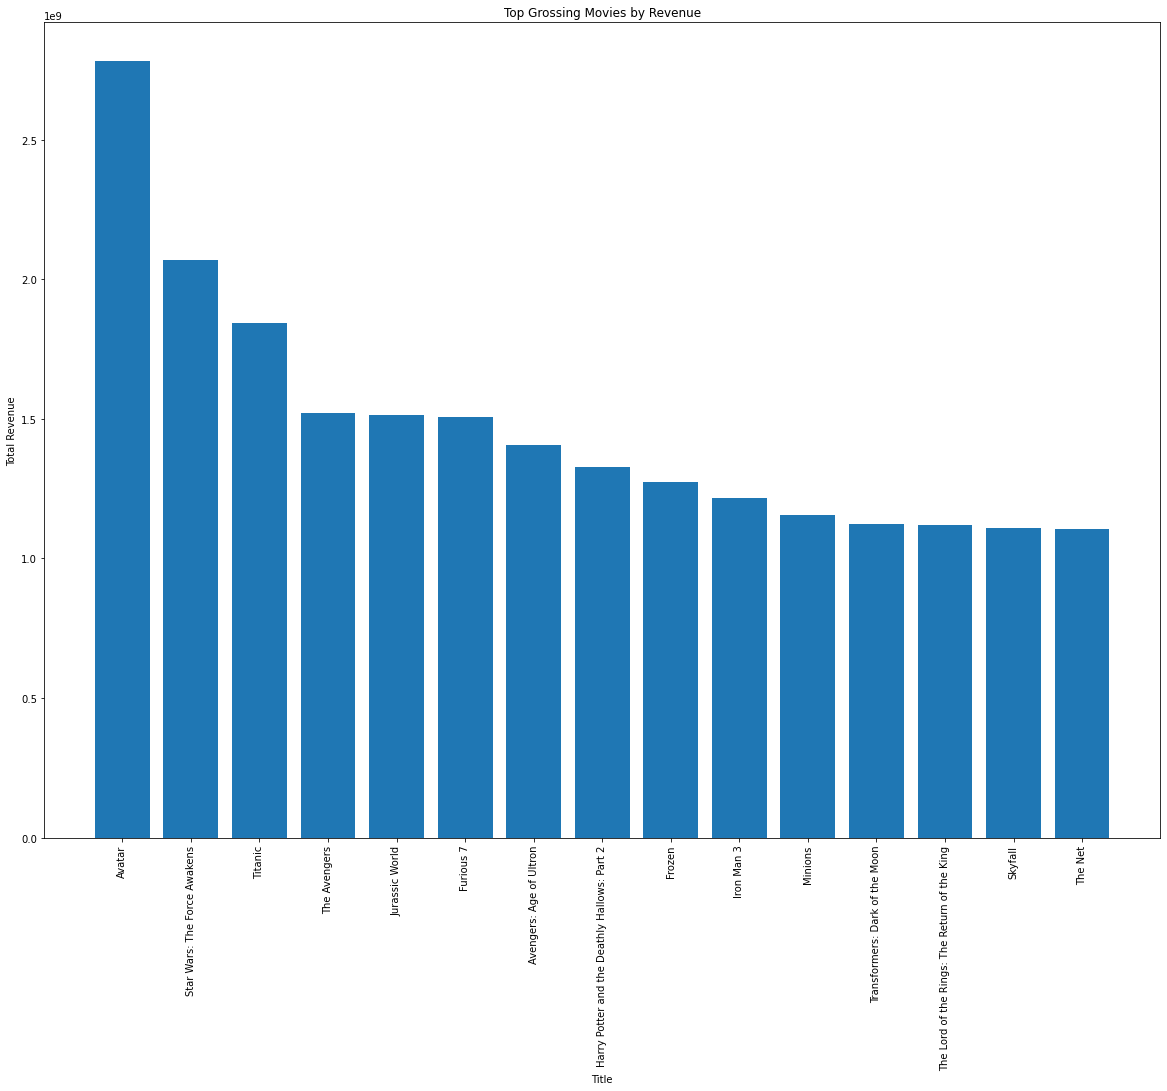

In [57]:
plt.subplots(figsize=(20, 15))
plt.bar(highest_grossing_movies['original_title'], highest_grossing_movies['revenue'])
plt.title('Top Grossing Movies by Revenue')
plt.xlabel('Title')
plt.ylabel('Total Revenue')
plt.xticks(rotation='vertical')

<a id="conclusions"></a>
## Conclusions

> Using the cell below, write a brief conclusion of what you have found from the anaylsis of the data. The Cell below will allow you to write plan text instead of code.

In [ ]:
Steven Spielberg even though being the best grossing director, none of his movies are top 15 grossing movies. Avatar which came out
in 2009 is still the highest grossing film by revenue. Am surprised that animation is not top 5 genre. 